# Download Dataset

Import Libraries 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from pandas_profiling import ProfileReport


Download Secom.data and Put it in dataframe(df1)

In [39]:
url1 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
names = ["feature" + str(x) for x in range(1, 591)]
df1 = pd.read_csv(url1,sep=" ", names=names, na_values = "NaN",header=None)
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


Download Secom Label.data and Put it in dataframe(df2) and rename the columns

In [61]:
url2 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
df2 = pd.read_csv(url2,sep=" ",names = ["Result","Date"])

#df2.columns =['Pass/Fail','Date']
df2.head()

,Result,Date
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


Joining both the datasets 

In [62]:

Secom = pd.merge(df1, df2,left_index=True,right_index=True)
print(Secom)

      feature1  feature2   feature3   feature4  feature5  feature6  feature7  \
0      3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1      3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2      2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3      2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4      3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   
...        ...       ...        ...        ...       ...       ...       ...   
1562   2899.41   2464.36  2179.7333  3085.3781    1.4843     100.0   82.2467   
1563   3052.31   2522.55  2198.5667  1124.6595    0.8763     100.0   98.4689   
1564   2978.81   2379.78  2206.3000  1110.4967    0.8236     100.0   99.4122   
1565   2894.92   2532.01  2177.0333  1183.7287    1.5726     100.0   98.7978   
1566   2944.92   2450.76  2195.4444  2914.1792    1.5978     100.0   85.1011   

      feature8  feature9  feature10  ..

In [63]:
Secom.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result,Date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


We can assume there are 590 independent processes that together add up to create a semiconductor and at the end of the process they are tagged as success or failure in terms of creating 1 new functional semiconductor unit.
There are quite a few NaN entries and entries which are equal to the value 0.
The 0s are not sparse you can see quite a few of them in continuation which may indicate an error or lack of signal i/o.



In [64]:
Secom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, feature1 to Date
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


**Formatting Date column**

In [65]:
Secom.loc[:, 'Date'] = pd.to_datetime(Secom.loc[:, 'Date'])
Secom.set_index('Date', inplace = True) # set index on dataset
print(Secom.head()) 
print(Secom.tail()) 

                     feature1  feature2   feature3   feature4  feature5  \
Date                                                                      
2008-07-19 11:55:00   3030.93   2564.00  2187.7333  1411.1265    1.3602   
2008-07-19 12:32:00   3095.78   2465.14  2230.4222  1463.6606    0.8294   
2008-07-19 13:17:00   2932.61   2559.94  2186.4111  1698.0172    1.5102   
2008-07-19 14:43:00   2988.72   2479.90  2199.0333   909.7926    1.3204   
2008-07-19 15:22:00   3032.24   2502.87  2233.3667  1326.5200    1.5334   

                     feature6  feature7  feature8  feature9  feature10  ...  \
Date                                                                    ...   
2008-07-19 11:55:00     100.0   97.6133    0.1242    1.5005     0.0162  ...   
2008-07-19 12:32:00     100.0  102.3433    0.1247    1.4966    -0.0005  ...   
2008-07-19 13:17:00     100.0   95.4878    0.1241    1.4436     0.0041  ...   
2008-07-19 14:43:00     100.0  104.2367    0.1217    1.4882    -0.0124  ...   


**Get the exact number of manufacturing Pass and failures**

In [46]:
Counter(Secom['Pass/Fail'])

Counter({-1: 1463, 1: 104})

# Exploratory Data Analysis Before Cleaning the Data

**summary statistics for the entire dataset**

In [47]:
Secom.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**Plotting a histogram of the pass and fail cases**

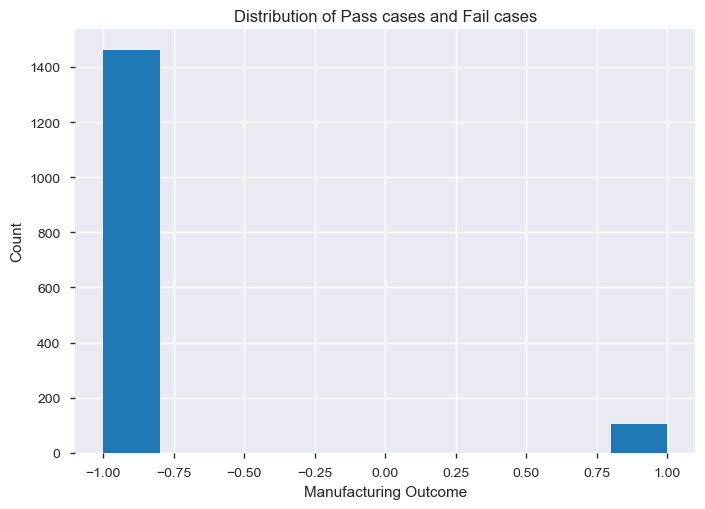

In [50]:

plt.hist(Secom['Pass/Fail'])
plt.title('Distribution of Pass cases and Fail cases')
plt.ylabel('Count')
plt.xlabel('Manufacturing Outcome')
plt.show()


Text(0.5, 1.0, 'Time series of Result')

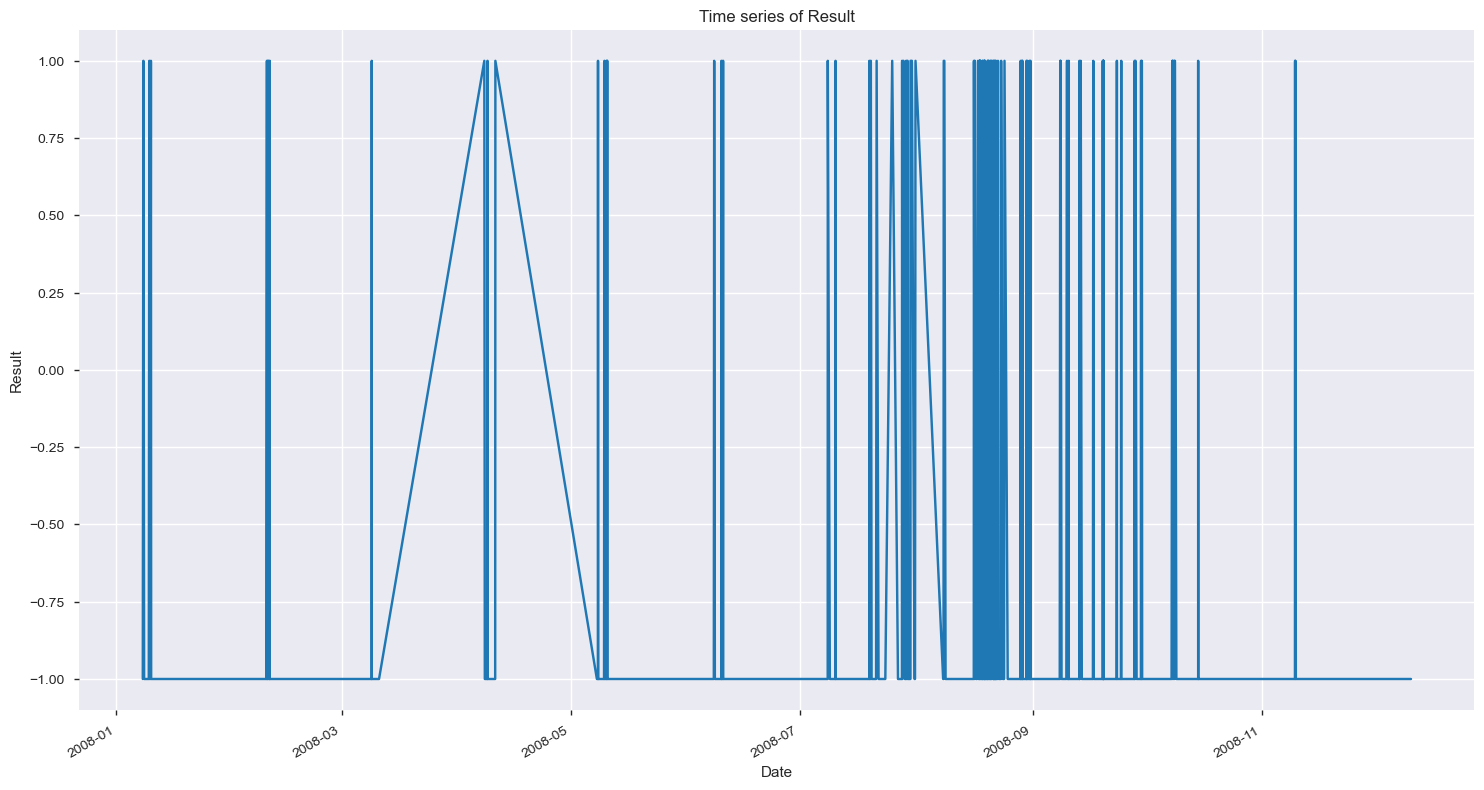

In [67]:
# plot the manufacturing outcome as a time series
ax = plt.figure(figsize=(18, 10)).gca() # define plot
Secom.Result.plot(ax = ax) # plot result
ax.set_xlabel('Date')
ax.set_ylabel('Result')
ax.set_title('Time series of Result')

**plot a histogram of the distributions of a few features**

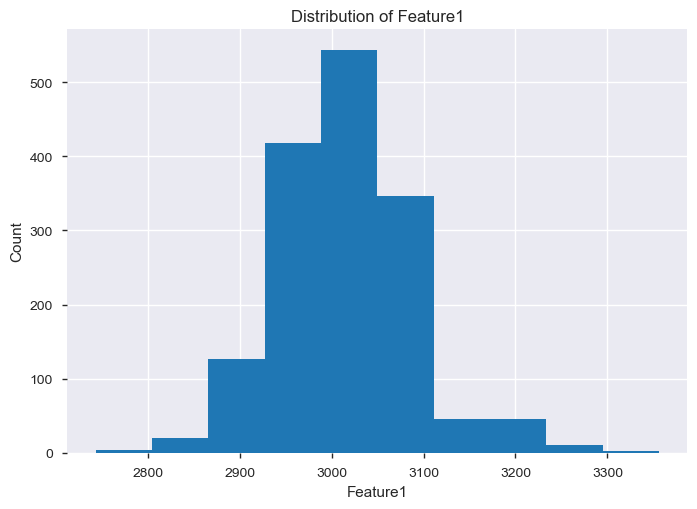

In [51]:
plt.hist(Secom.feature1)
plt.title('Distribution of Feature1')
plt.ylabel('Count')
plt.xlabel('Feature1')
plt.show()

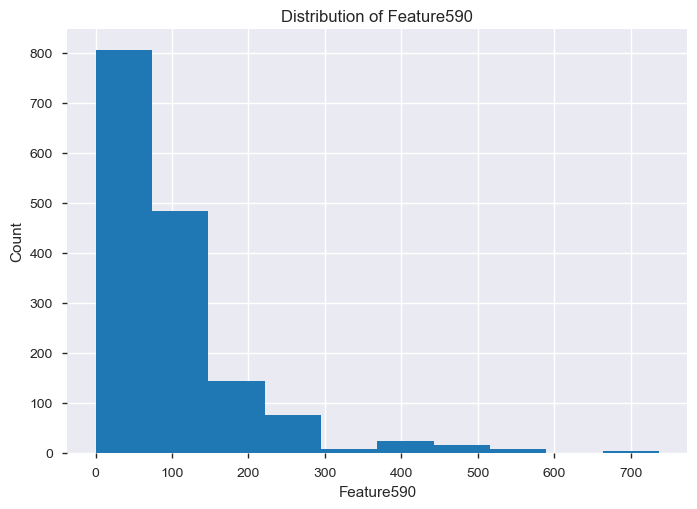

In [53]:
plt.hist(Secom.feature590)
plt.title('Distribution of Feature590')
plt.ylabel('Count')
plt.xlabel('Feature590')
plt.show()